### Mike Ogrysko
### CS 737 Machine Learning

Unsupervised learning using synthetic clustering dataset

- Rough feature ranges
- K-means clustering for anomolies
- DBSCAN clustering to find anomalies
- Decision tree classifier to model the species and visualize the model decision tree - clean data
- Comparison without cleaning data

In [1]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from subprocess import run, PIPE, call
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# locate and load the data file
dfOrg = pd.read_csv('./synthetic_clustering_dataset.csv')

# Sanity
print(f'#rows={len(dfOrg)} #columns={len(dfOrg.columns)}')
dfOrg.head()

#rows=750 #columns=2


,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


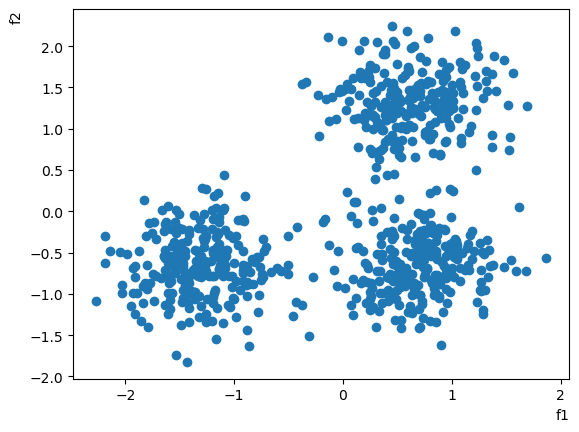

In [5]:
#try plotting the features
plt.scatter(dfOrg.f1, dfOrg.f2)
plt.xlabel(r'f1', horizontalalignment='right', x=1.0)
plt.ylabel(r'f2', horizontalalignment='right', y=1.0)
plt.show()

**Finding rough feature ranges**

In [6]:
print('f1 min: ', dfOrg.f1.min())
print('f1 max: ', dfOrg.f1.max())
print('f2 min: ', dfOrg.f2.min())
print('f2 max: ', dfOrg.f2.max())

f1 min:  -2.27447426719
f1 max:  1.87043802694
f2 min:  -1.82380067733
f2 max:  2.2457941917


In [7]:
#species 1
result_index_f2_sp1_top = dfOrg['f1'].sub(-.4).abs().idxmin()
result_index_f2_sp1_bottom = dfOrg['f2'].sub(-2).abs().idxmin()
result_index_f1_sp1_left = dfOrg['f2'].sub(.43).abs().idxmin()
result_index_f1_sp1_right = dfOrg['f1'].sub(-3).abs().idxmin()
#species 2
result_index_f2_sp2_top = dfOrg['f2'].sub(.47).abs().idxmin()
result_index_f2_sp2_bottom = dfOrg['f2'].sub(-1.6).abs().idxmin()
result_index_f1_sp2_left = dfOrg['f1'].sub(-.36).abs().idxmin()
result_index_f1_sp2_right = dfOrg['f1'].sub(2).abs().idxmin()
#species 3
result_index_f2_sp3_top = dfOrg['f2'].sub(3).abs().idxmin()
result_index_f2_sp3_bottom = dfOrg['f2'].sub(.5).abs().idxmin()
result_index_f1_sp3_left = dfOrg['f1'].sub(-.38).abs().idxmin()
result_index_f1_sp3_right = dfOrg['f1'].sub(1.75).abs().idxmin()
#print
print(dfOrg.iloc[result_index_f2_sp1_top])
print(dfOrg.iloc[result_index_f2_sp1_bottom])
print(dfOrg.iloc[result_index_f1_sp1_left])
print(dfOrg.iloc[result_index_f1_sp1_right])
print(dfOrg.iloc[result_index_f2_sp2_top])
print(dfOrg.iloc[result_index_f2_sp2_bottom])
print(dfOrg.iloc[result_index_f1_sp2_left])
print(dfOrg.iloc[result_index_f1_sp2_right])
print(dfOrg.iloc[result_index_f2_sp3_top])
print(dfOrg.iloc[result_index_f2_sp3_bottom])
print(dfOrg.iloc[result_index_f1_sp3_left])
print(dfOrg.iloc[result_index_f1_sp3_right])

f1   -0.422276
f2   -0.190345
Name: 146, dtype: float64
f1   -1.430208
f2   -1.823801
Name: 16, dtype: float64
f1   -1.093526
f2    0.435205
Name: 570, dtype: float64
f1   -2.274474
f2   -1.087520
Name: 531, dtype: float64
f1    0.467506
f2    0.450459
Name: 82, dtype: float64
f1    0.904913
f2   -1.624734
Name: 337, dtype: float64
f1   -0.374479
f2   -1.136242
Name: 684, dtype: float64
f1    1.870438
f2   -0.564764
Name: 663, dtype: float64
f1    0.454419
f2    2.245794
Name: 389, dtype: float64
f1    1.224255
f2    0.501611
Name: 95, dtype: float64
f1   -0.376722
f2    1.543001
Name: 343, dtype: float64
f1    1.687451
f2    1.278308
Name: 110, dtype: float64


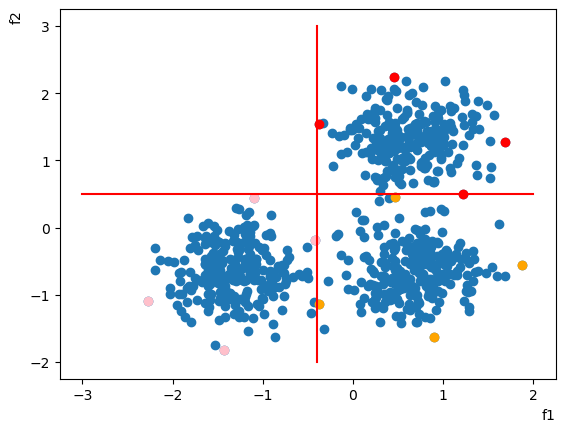

In [8]:
#Try plotting the features
plt.scatter(dfOrg.f1, dfOrg.f2)
#Species 1
plt.scatter(dfOrg.f1[570],dfOrg.f2[570], color='pink')#top
plt.scatter(dfOrg.f1[16],dfOrg.f2[16], color='pink')#bottom
plt.scatter(dfOrg.f1[531],dfOrg.f2[531], color='pink')#left
plt.scatter(dfOrg.f1[146],dfOrg.f2[146], color='pink')#right
#Species 2
plt.scatter(dfOrg.f1[663],dfOrg.f2[663], color='orange')#right
plt.scatter(dfOrg.f1[684],dfOrg.f2[684], color='orange')#left
plt.scatter(dfOrg.f1[337],dfOrg.f2[337], color='orange')#bottom
plt.scatter(dfOrg.f1[82],dfOrg.f2[82], color='orange')#top
#Species 3
plt.scatter(dfOrg.f1[389],dfOrg.f2[389], color='red')#top
plt.scatter(dfOrg.f1[343],dfOrg.f2[343], color='red')#left
plt.scatter(dfOrg.f1[110],dfOrg.f2[110], color='red')#right
plt.scatter(dfOrg.f1[95],dfOrg.f2[95], color='red')#bottom
#Line
plt.plot([-3, 2], [.5, .5], '-', color = 'r')
plt.plot([-.4, -.4], [-2, 3], '-', color = 'r')
plt.xlabel(r'f1', horizontalalignment='right', x=1.0)
plt.ylabel(r'f2', horizontalalignment='right', y=1.0)
plt.show()

In [9]:
print('Species 1 has feature 1 in the range of [-2.274474,-0.422276]')
print('Species 1 has feature 2 in the range of [-1.823801,0.435205]')

print('Species 2 has feature 1 in the range of [-0.374479,1.870438]')
print('Species 2 has feature 2 in the range of [-1.624734,0.450459]')

print('Species 3 has feature 1 in the range of [-0.374479,1.870438]')
print('Species 3 has feature 2 in the range of [0.501611,2.245794]')

Species 1 has feature 1 in the range of [-2.274474,-0.422276]
Species 1 has feature 2 in the range of [-1.823801,0.435205]
Species 2 has feature 1 in the range of [-0.374479,1.870438]
Species 2 has feature 2 in the range of [-1.624734,0.450459]
Species 3 has feature 1 in the range of [-0.374479,1.870438]
Species 3 has feature 2 in the range of [0.501611,2.245794]


**K-means clustering to find anomalies**

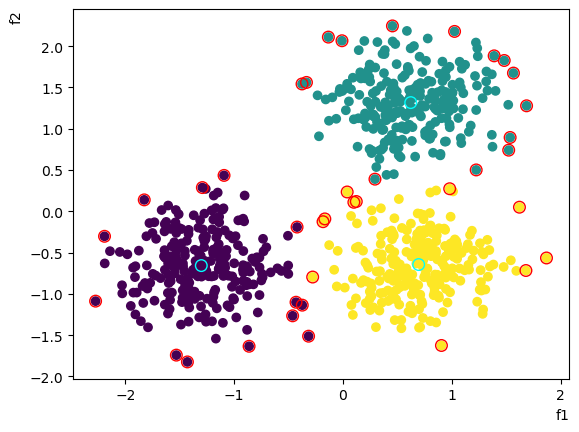

Centroids:
 [[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]
Outliers:
 [[-1.4302079  -1.82380068]
 [-1.29275264  0.28788197]
 [-1.53199232 -1.74146844]
 [-0.42227599 -0.19034456]
 [-0.46307453 -1.26531795]
 [-1.82702823  0.13893299]
 [-0.43185167 -1.10093485]
 [-0.3164503  -1.51218921]
 [-2.27447427 -1.08752048]
 [-1.0935262   0.43520463]
 [-2.19229513 -0.30228576]
 [-0.86338803 -1.63431796]
 [-0.37447929 -1.13624183]
 [-0.13447918  2.11039748]
 [ 1.48201718  1.82713556]
 [ 1.22425496  0.50161091]
 [ 1.53624088  0.89460489]
 [ 1.68745105  1.27830756]
 [ 1.52307352  0.74115752]
 [ 1.02546663  2.17903747]
 [-0.00943759  2.06614833]
 [-0.33579552  1.56140541]
 [-0.37672226  1.54300065]
 [ 0.45441914  2.24579419]
 [ 1.38939876  1.88316297]
 [ 0.29375547  0.38990412]
 [ 1.5667784   1.67458369]
 [-0.16699918 -0.0916528 ]
 [ 0.09982456  0.10950372]
 [ 1.62198217  0.05020132]
 [-0.18357785 -0.12543358]
 [ 0.90491286 -1.62473398]
 [ 0.12203814  0.11914361]
 [ 0

In [10]:
#get X
X = dfOrg.values

#kmeans
km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, random_state=42)
clusters = km.fit_predict(X)

#identify centroids
centroids = km.cluster_centers_

#identify points
points = np.empty((0,len(X[0])),float)

#identify distances
distances = np.empty((0,len(X[0])),float)
for i, center in enumerate(centroids):
    distances = np.append(distances, cdist([center],X[clusters == i],'euclidean'))
    points = np.append(points, X[clusters == i], axis=0)

#set percentile
percentile = 95
outliers3 = points[np.where(distances > np.percentile(distances,percentile))]

#plot
plt.scatter(*zip(*X), c=clusters)
#centroids are aqua
plt.scatter(*zip(*centroids),marker='o',facecolor='None',edgecolor='aqua',s=70)
#outliers are red
plt.scatter(*zip(*outliers3),marker='o',facecolor='None',edgecolor='r',s=70)
plt.xlabel(r'f1', horizontalalignment='right', x=1.0)
plt.ylabel(r'f2', horizontalalignment='right', y=1.0)
plt.show()

#print centroids
print('Centroids:\n', centroids)

#print outliers
print('Outliers:\n', outliers3)

**DBSCAN clustering to find anomalies**

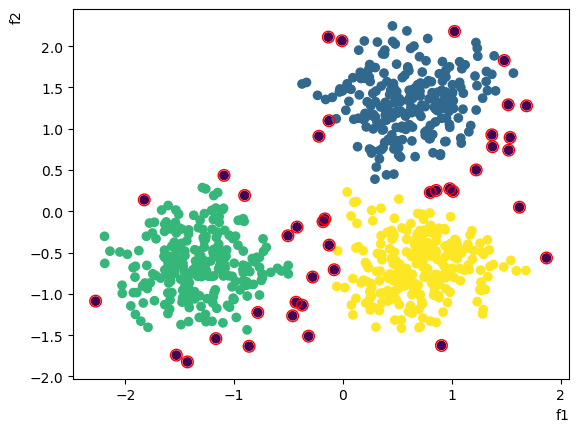

Outliers:
 [[-0.78329914 -1.2248967 ]
 [-1.4302079  -1.82380068]
 [-0.50601383 -0.29571545]
 [-0.16699918 -0.0916528 ]
 [-0.13447918  2.11039748]
 [ 1.48201718  1.82713556]
 [ 1.22425496  0.50161091]
 [ 1.53624088  0.89460489]
 [ 1.68745105  1.27830756]
 [-1.53199232 -1.74146844]
 [-0.42227599 -0.19034456]
 [ 1.52307352  0.74115752]
 [ 1.02546663  2.17903747]
 [-0.00943759  2.06614833]
 [-0.46307453 -1.26531795]
 [ 0.85640775  0.25275335]
 [-0.12897596  1.09716295]
 [-0.904114    0.19181843]
 [ 0.80203144  0.22821584]
 [ 1.62198217  0.05020132]
 [-0.18357785 -0.12543358]
 [-1.82702823  0.13893299]
 [ 0.90491286 -1.62473398]
 [-0.12723135 -0.4090389 ]
 [-0.0811644  -0.70769103]
 [ 1.01170962  0.24102378]
 [-0.43185167 -1.10093485]
 [-0.22115639  0.90920018]
 [-0.3164503  -1.51218921]
 [-1.16838237 -1.5414789 ]
 [-2.27447427 -1.08752048]
 [ 1.37406167  0.78263973]
 [-1.0935262   0.43520463]
 [ 0.9807011   0.27373202]
 [-0.86338803 -1.63431796]
 [ 1.36805165  0.92679944]
 [ 1.87043803 -0.

In [11]:
#dbscan
dbs = DBSCAN(eps = .2, min_samples = 5)
dbs.fit(X)
species = dbs.labels_

#plot
plt.scatter(X[:,0],X[:,1], c = species)
outliers4 = X[dbs.labels_ == -1]
#outliers are red
plt.scatter(*zip(*outliers4),marker='o',facecolor='None',edgecolor='r',s=70)
plt.xlabel(r'f1', horizontalalignment='right', x=1.0)
plt.ylabel(r'f2', horizontalalignment='right', y=1.0)
plt.show()

#print outliers
print('Outliers:\n', outliers4)

**Decision tree classifier to model the species and visualize the model decision tree - clean data**

In [12]:
#use dbscan outliers
print('# of DBSCAN outliers: ', len(outliers4))

# of DBSCAN outliers:  40


In [13]:
dfOrg5 = dfOrg.copy()

In [14]:
dfOrg5.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


In [15]:
#filter out outliers
dfOrg5 = dfOrg5[~dfOrg5.f1.isin(outliers4[:,0])]
dfOrg5.shape

(710, 2)

In [16]:
#remove outliers (-1)
species5 = species[species != -1]
#get species count
print('Species count: ', len(species5))

Species count:  710


In [17]:
#add species to df
dfOrg5['species'] = species5

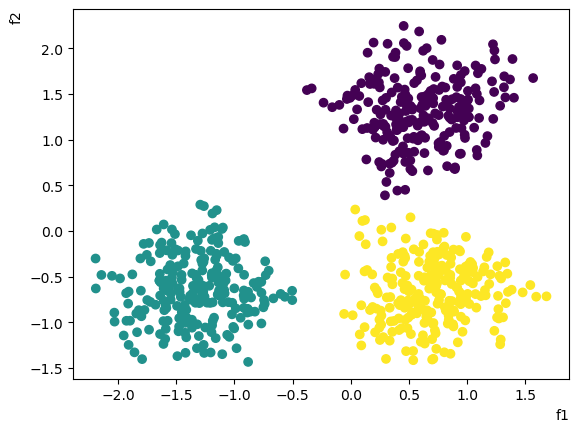

In [18]:
#check scatter
plt.scatter(dfOrg5.f1,dfOrg5.f2, c = species5)
plt.xlabel(r'f1', horizontalalignment='right', x=1.0)
plt.ylabel(r'f2', horizontalalignment='right', y=1.0)
plt.show()

In [19]:
#set X,y
X = dfOrg5.drop(['species'], axis=1).values
y = dfOrg5['species'].values
X.shape,y.shape

((710, 2), (710,))

In [20]:
dt = DecisionTreeClassifier()
model = dt.fit(X, y)

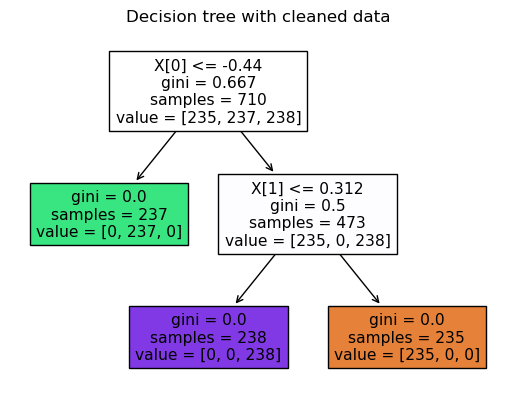

In [21]:
#display dt
plt.figure()
tree.plot_tree(model, filled=True)
plt.title("Decision tree with cleaned data")
plt.show()

**Comparison without cleaning data**

In [22]:
dfOrg6 = dfOrg.copy()

In [23]:
dfOrg6['species'] = species
dfOrg6.shape

(750, 3)

In [24]:
#set X,y
X = dfOrg6.drop(['species'], axis=1).values
y = dfOrg6['species'].values
X.shape,y.shape

((750, 2), (750,))

In [25]:
dt6 = DecisionTreeClassifier()
model6 = dt6.fit(X, y)

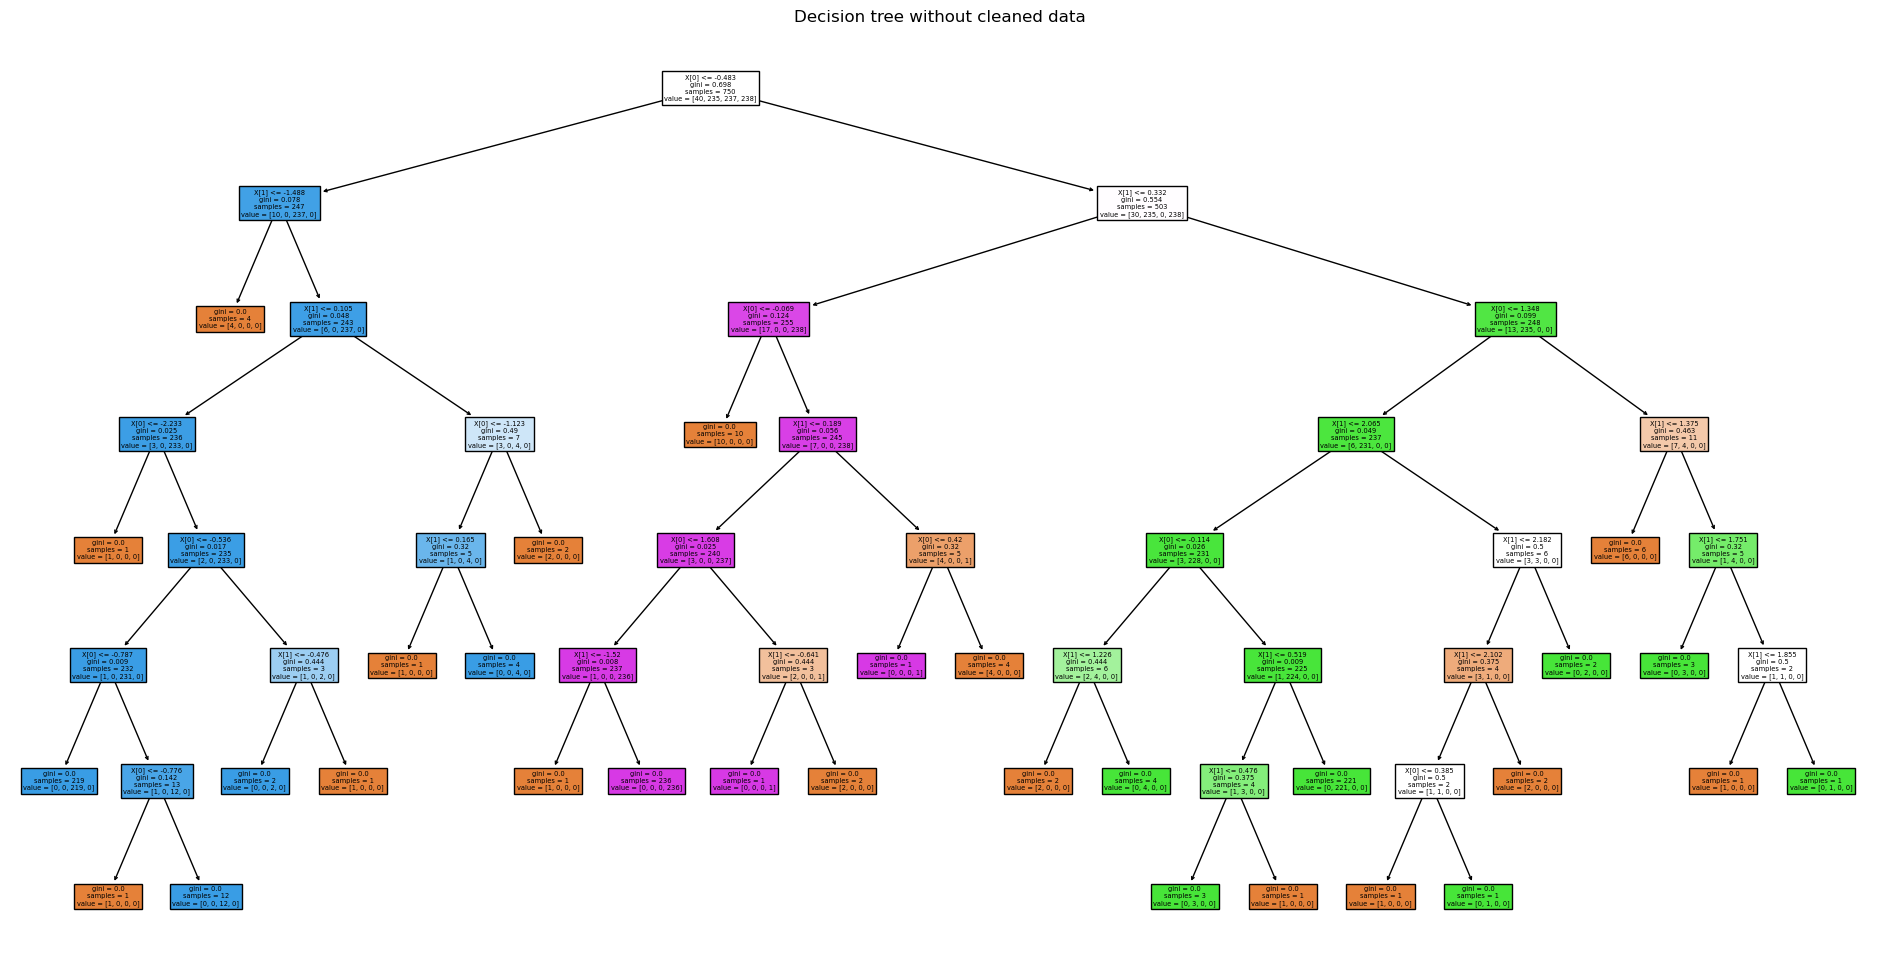

In [26]:
#display dt
plt.figure(figsize=(24,12))
tree.plot_tree(model6, filled=True)
plt.title("Decision tree without cleaned data")
plt.show()